# Class Challenge: Image Classification of COVID-19 X-rays
# Task 2 [Total points: 30]

## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



## [20 points] Multi-class Classification

In [1]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.1.0'

#### Load Image Data

In [2]:
DATA_LIST = os.listdir('all/train')
DATASET_PATH  = 'all/train'
TEST_DIR =  'all/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 100
LEARNING_RATE = 0.0001 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')


train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="categorical")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,class_mode="categorical")

/opt/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 216 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [4]:
from keras import models
from keras import layers
from keras.applications import VGG16
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout

# VGG16
VGG16 = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

VGG16.trainable = False

vgg16 = models.Sequential(name='VGG16')
vgg16.add(VGG16)
vgg16.add(layers.Flatten())
vgg16.add(layers.Dense(256, name='feature_dense', activation='relu'))
vgg16.add(layers.Dense(4, activation='softmax'))

vgg16.summary()
vgg16.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=LEARNING_RATE),
              metrics=['acc'])

Using TensorFlow backend.


Model: "VGG16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
feature_dense (Dense)        (None, 256)               6422784   
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1028      
Total params: 21,138,500
Trainable params: 6,423,812
Non-trainable params: 14,714,688
_________________________________________________________________


In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import optimizers

# AlexNet
alexnet = Sequential(name='AlexNet')

alexnet.add(Conv2D(filters=96, 
                   input_shape=(224,224,3), 
                   kernel_size=(11,11), 
                   strides=(4,4), 
                   padding='valid', 
                   activation='relu'))
alexnet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

alexnet.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid', activation='relu'))

alexnet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

alexnet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
alexnet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
alexnet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))

alexnet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

alexnet.add(Flatten())
alexnet.add(Dense(256, activation='relu', name='feature_dense'))
alexnet.add(Dense(4, activation='softmax'))

alexnet.summary()

alexnet.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=LEARNING_RATE),
              metrics=['acc'])

Model: "AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 6, 384)         885120    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 384)         1327488   
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 2, 2, 256)         8849

In [6]:
import keras
from keras.applications import ResNet50
from keras import models
from keras import layers
from keras import optimizers
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Flatten, Dense, Dropout

# ResNet50
resnet50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
# resnet50.trainable = False
resnet = models.Sequential(name='ResNet50')
resnet.add(resnet50)
resnet.add(layers.Flatten())
resnet.add(layers.Dense(256, name='feature_dense', activation='relu'))
resnet.add(layers.Dense(4, activation='softmax'))

resnet.summary()
resnet.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=LEARNING_RATE),
              metrics=['acc'])



/opt/anaconda3/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "ResNet50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_3 (Flatten)          (None, 100352)            0         
_________________________________________________________________
feature_dense (Dense)        (None, 256)               25690368  
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 1028      
Total params: 49,279,108
Trainable params: 49,225,988
Non-trainable params: 53,120
_________________________________________________________________


In [25]:
from keras.applications import MobileNet
from keras import models
from keras import layers
from keras import optimizers
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Flatten, Dense, Dropout

# MobileNet
mobile = MobileNet(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

mobilenet = models.Sequential(name='MobileNet')
mobilenet.add(mobile)
mobilenet.add(layers.Flatten())
mobilenet.add(layers.Dense(256, name='feature_dense', activation='relu'))
mobilenet.add(layers.Dense(4, activation='softmax'))

mobilenet.summary()
mobilenet.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=LEARNING_RATE),
              metrics=['acc'])

Model: "MobileNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten_6 (Flatten)          (None, 50176)             0         
_________________________________________________________________
feature_dense (Dense)        (None, 256)               12845312  
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 1028      
Total params: 16,075,204
Trainable params: 16,053,316
Non-trainable params: 21,888
_________________________________________________________________


#### [5 points] Train Model

In [8]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

22
6


In [9]:
res_vgg16=vgg16.fit(train_batches,
                        steps_per_epoch =STEP_SIZE_TRAIN,
                        validation_data = valid_batches,
                        validation_steps = STEP_SIZE_VALID,
                        epochs=NUM_EPOCHS) 

Epoch 1/100


/opt/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


21/21 [==============================] - 34s 2s/step - loss: 1.4695 - acc: 0.3058 - val_loss: 1.1015 - val_acc: 0.3600
Epoch 2/100
21/21 [==============================] - 33s 2s/step - loss: 1.1820 - acc: 0.4854 - val_loss: 1.1529 - val_acc: 0.4545
Epoch 3/100
21/21 [==============================] - 36s 2s/step - loss: 1.0907 - acc: 0.4951 - val_loss: 0.8262 - val_acc: 0.5682
Epoch 4/100
21/21 [==============================] - 34s 2s/step - loss: 0.9542 - acc: 0.6019 - val_loss: 1.2123 - val_acc: 0.4091
Epoch 5/100
21/21 [==============================] - 32s 2s/step - loss: 0.9386 - acc: 0.5728 - val_loss: 0.8646 - val_acc: 0.5909
Epoch 6/100
21/21 [==============================] - 33s 2s/step - loss: 0.8378 - acc: 0.6942 - val_loss: 0.6907 - val_acc: 0.6364
Epoch 7/100
21/21 [==============================] - 34s 2s/step - loss: 0.8618 - acc: 0.6524 - val_loss: 0.6992 - val_acc: 0.5400
Epoch 8/100
21/21 [==============================] - 34s 2s/step - loss: 0.9386 - acc: 0.5644 -

21/21 [==============================] - 36s 2s/step - loss: 0.5443 - acc: 0.8058 - val_loss: 0.8338 - val_acc: 0.7500
Epoch 64/100
21/21 [==============================] - 36s 2s/step - loss: 0.6141 - acc: 0.7327 - val_loss: 0.4591 - val_acc: 0.6818
Epoch 65/100
21/21 [==============================] - 36s 2s/step - loss: 0.5840 - acc: 0.7429 - val_loss: 0.8106 - val_acc: 0.7045
Epoch 66/100
21/21 [==============================] - 35s 2s/step - loss: 0.5157 - acc: 0.7767 - val_loss: 0.8195 - val_acc: 0.6818
Epoch 67/100
21/21 [==============================] - 37s 2s/step - loss: 0.6098 - acc: 0.7330 - val_loss: 0.4970 - val_acc: 0.6600
Epoch 68/100
21/21 [==============================] - 36s 2s/step - loss: 0.5602 - acc: 0.8058 - val_loss: 0.4283 - val_acc: 0.6818
Epoch 69/100
21/21 [==============================] - 37s 2s/step - loss: 0.5481 - acc: 0.7670 - val_loss: 1.1116 - val_acc: 0.5455
Epoch 70/100
21/21 [==============================] - 36s 2s/step - loss: 0.4885 - acc: 0

In [24]:
res_alexnet=alexnet.fit(train_batches,
                        steps_per_epoch =STEP_SIZE_TRAIN,
                        validation_data = valid_batches,
                        validation_steps = STEP_SIZE_VALID,
                        epochs=NUM_EPOCHS)

Epoch 1/100


/opt/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


21/21 [==============================] - 10s 465ms/step - loss: 1.3979 - acc: 0.1699 - val_loss: 1.3654 - val_acc: 0.2400
Epoch 2/100
21/21 [==============================] - 10s 462ms/step - loss: 1.3882 - acc: 0.2573 - val_loss: 1.3906 - val_acc: 0.2500
Epoch 3/100
21/21 [==============================] - 10s 462ms/step - loss: 1.3853 - acc: 0.2767 - val_loss: 1.3850 - val_acc: 0.2045
Epoch 4/100
21/21 [==============================] - 9s 434ms/step - loss: 1.3866 - acc: 0.2087 - val_loss: 1.3839 - val_acc: 0.2273
Epoch 5/100
21/21 [==============================] - 9s 446ms/step - loss: 1.3868 - acc: 0.2286 - val_loss: 1.3871 - val_acc: 0.2500
Epoch 6/100
21/21 [==============================] - 9s 429ms/step - loss: 1.3849 - acc: 0.2970 - val_loss: 1.3929 - val_acc: 0.2727
Epoch 7/100
21/21 [==============================] - 9s 442ms/step - loss: 1.3873 - acc: 0.2095 - val_loss: 1.3798 - val_acc: 0.2800
Epoch 8/100
21/21 [==============================] - 10s 478ms/step - loss: 1.

21/21 [==============================] - 10s 480ms/step - loss: 1.1662 - acc: 0.4857 - val_loss: 1.7381 - val_acc: 0.4091
Epoch 63/100
21/21 [==============================] - 9s 420ms/step - loss: 1.1762 - acc: 0.3981 - val_loss: 1.3301 - val_acc: 0.2045
Epoch 64/100
21/21 [==============================] - 9s 434ms/step - loss: 1.2490 - acc: 0.3544 - val_loss: 1.1139 - val_acc: 0.4091
Epoch 65/100
21/21 [==============================] - 9s 419ms/step - loss: 1.2691 - acc: 0.3960 - val_loss: 1.1425 - val_acc: 0.3636
Epoch 66/100
21/21 [==============================] - 9s 444ms/step - loss: 1.1820 - acc: 0.4000 - val_loss: 0.7650 - val_acc: 0.4318
Epoch 67/100
21/21 [==============================] - 9s 442ms/step - loss: 1.1948 - acc: 0.4369 - val_loss: 1.1191 - val_acc: 0.5200
Epoch 68/100
21/21 [==============================] - 10s 469ms/step - loss: 1.1956 - acc: 0.4612 - val_loss: 1.5542 - val_acc: 0.3864
Epoch 69/100
21/21 [==============================] - 9s 448ms/step - los

In [11]:
res_resnet=resnet.fit(train_batches,
                        steps_per_epoch =STEP_SIZE_TRAIN,
                        validation_data = valid_batches,
                        validation_steps = STEP_SIZE_VALID,
                        epochs=NUM_EPOCHS) 

Epoch 1/100


/opt/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


21/21 [==============================] - 80s 4s/step - loss: 3.3572 - acc: 0.4417 - val_loss: 1.6044 - val_acc: 0.2800
Epoch 2/100
21/21 [==============================] - 63s 3s/step - loss: 1.3558 - acc: 0.5524 - val_loss: 1.5878 - val_acc: 0.2500
Epoch 3/100
21/21 [==============================] - 66s 3s/step - loss: 0.7854 - acc: 0.6634 - val_loss: 1.3960 - val_acc: 0.2045
Epoch 4/100
21/21 [==============================] - 63s 3s/step - loss: 0.7878 - acc: 0.6893 - val_loss: 3.7652 - val_acc: 0.2045
Epoch 5/100
21/21 [==============================] - 62s 3s/step - loss: 0.7584 - acc: 0.6952 - val_loss: 3.1831 - val_acc: 0.2500
Epoch 6/100
21/21 [==============================] - 64s 3s/step - loss: 0.7178 - acc: 0.7277 - val_loss: 4.3105 - val_acc: 0.2045
Epoch 7/100
21/21 [==============================] - 67s 3s/step - loss: 0.5894 - acc: 0.7282 - val_loss: 1.7469 - val_acc: 0.2400
Epoch 8/100
21/21 [==============================] - 65s 3s/step - loss: 0.6714 - acc: 0.7476 -

21/21 [==============================] - 61s 3s/step - loss: 0.1736 - acc: 0.9223 - val_loss: 0.6016 - val_acc: 0.7500
Epoch 64/100
21/21 [==============================] - 60s 3s/step - loss: 0.1730 - acc: 0.9175 - val_loss: 0.5468 - val_acc: 0.7500
Epoch 65/100
21/21 [==============================] - 60s 3s/step - loss: 0.1821 - acc: 0.9612 - val_loss: 1.8757 - val_acc: 0.6818
Epoch 66/100
21/21 [==============================] - 61s 3s/step - loss: 0.2103 - acc: 0.9175 - val_loss: 0.2536 - val_acc: 0.8636
Epoch 67/100
21/21 [==============================] - 62s 3s/step - loss: 0.1711 - acc: 0.9320 - val_loss: 0.5258 - val_acc: 0.7200
Epoch 68/100
21/21 [==============================] - 63s 3s/step - loss: 0.1861 - acc: 0.9417 - val_loss: 1.0853 - val_acc: 0.7727
Epoch 69/100
21/21 [==============================] - 58s 3s/step - loss: 0.2128 - acc: 0.9223 - val_loss: 0.1995 - val_acc: 0.7955
Epoch 70/100
21/21 [==============================] - 58s 3s/step - loss: 0.1809 - acc: 0

In [12]:
res_mobilenet=mobilenet.fit(train_batches,
                        steps_per_epoch =STEP_SIZE_TRAIN,
                        validation_data = valid_batches,
                        validation_steps = STEP_SIZE_VALID,
                        epochs=NUM_EPOCHS) 

Epoch 1/100


/opt/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


21/21 [==============================] - 27s 1s/step - loss: 2.6804 - acc: 0.3835 - val_loss: 3.3073 - val_acc: 0.2600
Epoch 2/100
21/21 [==============================] - 20s 944ms/step - loss: 1.2265 - acc: 0.6214 - val_loss: 1.7496 - val_acc: 0.3864
Epoch 3/100
21/21 [==============================] - 20s 945ms/step - loss: 0.8850 - acc: 0.6748 - val_loss: 2.0496 - val_acc: 0.3409
Epoch 4/100
21/21 [==============================] - 20s 971ms/step - loss: 0.8446 - acc: 0.6796 - val_loss: 1.2913 - val_acc: 0.5455
Epoch 5/100
21/21 [==============================] - 20s 950ms/step - loss: 0.9444 - acc: 0.6456 - val_loss: 0.9136 - val_acc: 0.5682
Epoch 6/100
21/21 [==============================] - 20s 961ms/step - loss: 0.5395 - acc: 0.7714 - val_loss: 1.9016 - val_acc: 0.4318
Epoch 7/100
21/21 [==============================] - 20s 940ms/step - loss: 0.5365 - acc: 0.7673 - val_loss: 3.1663 - val_acc: 0.3400
Epoch 8/100
21/21 [==============================] - 21s 987ms/step - loss: 0

21/21 [==============================] - 22s 1s/step - loss: 0.1630 - acc: 0.9406 - val_loss: 0.3153 - val_acc: 0.7727
Epoch 63/100
21/21 [==============================] - 21s 1s/step - loss: 0.2031 - acc: 0.9333 - val_loss: 0.0848 - val_acc: 0.7500
Epoch 64/100
21/21 [==============================] - 20s 973ms/step - loss: 0.2364 - acc: 0.9223 - val_loss: 2.1958 - val_acc: 0.6818
Epoch 65/100
21/21 [==============================] - 20s 958ms/step - loss: 0.1963 - acc: 0.9320 - val_loss: 0.6848 - val_acc: 0.8182
Epoch 66/100
21/21 [==============================] - 20s 951ms/step - loss: 0.1937 - acc: 0.9175 - val_loss: 0.5134 - val_acc: 0.7727
Epoch 67/100
21/21 [==============================] - 20s 955ms/step - loss: 0.2897 - acc: 0.9078 - val_loss: 1.0900 - val_acc: 0.8200
Epoch 68/100
21/21 [==============================] - 20s 974ms/step - loss: 0.2657 - acc: 0.8981 - val_loss: 0.4996 - val_acc: 0.7045
Epoch 69/100
21/21 [==============================] - 20s 961ms/step - los

#### [5 points] Plot Accuracy and Loss During Training

VGG16


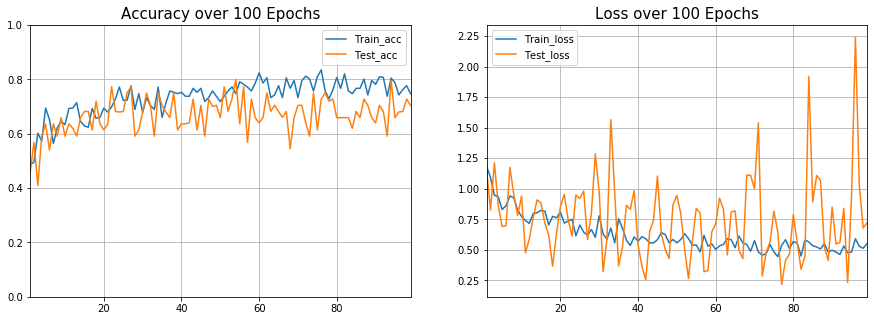

AlexNet


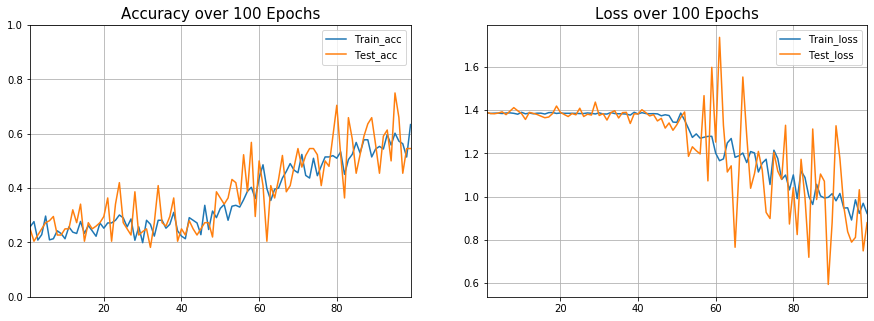

ResNet50


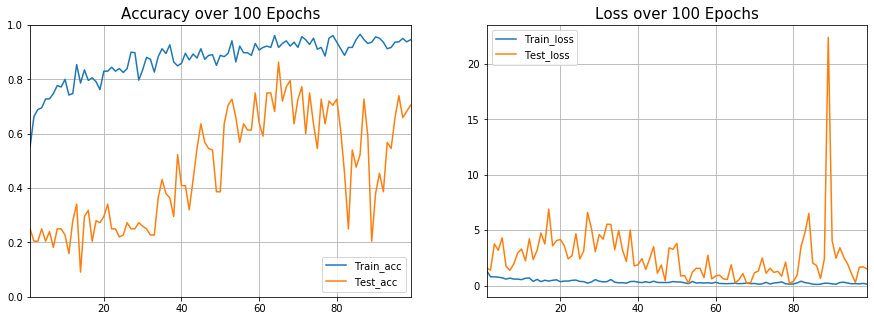

MobileNet


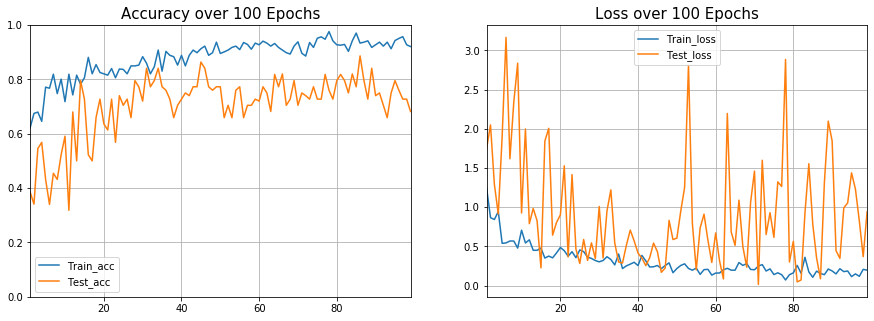

In [26]:
import matplotlib.pyplot as plt

def plot_acc_loss(result, epochs):
    acc = result.history['acc']
    loss = result.history['loss']
    val_acc = result.history['val_acc']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.ylim(0, 1)
    plt.xlim(1, epochs - 1)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.xlim(1, epochs - 1)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()

print("VGG16")
plot_acc_loss(res_vgg16, NUM_EPOCHS)
print("AlexNet")
plot_acc_loss(res_alexnet, NUM_EPOCHS)
print("ResNet50")
plot_acc_loss(res_resnet, NUM_EPOCHS)
print("MobileNet")
plot_acc_loss(res_mobilenet, NUM_EPOCHS)

#### Testing Model

In [15]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator.reset()
vgg16_eval = vgg16.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print("VGG16:")
print('Test loss:' , vgg16_eval[0])
print('Test accuracy:',vgg16_eval[1])

Found 36 images belonging to 4 classes.
36/36 [==============================] - 5s 134ms/step
VGG16:
Test loss: 2.2618610858917236
Test accuracy: 0.6666666865348816


In [27]:
eval_generator.reset()
alexnet_eval = alexnet.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print("AlexNet:")
print('Test loss:' , alexnet_eval[0])
print('Test accuracy:',alexnet_eval[1])

36/36 [==============================] - 1s 25ms/step
AlexNet:
Test loss: 1.0740188360214233
Test accuracy: 0.5833333134651184


In [17]:
eval_generator.reset()
resnet_eval = resnet.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print("ResNet50:")
print('Test loss:' , resnet_eval[0])
print('Test accuracy:',resnet_eval[1])

36/36 [==============================] - 3s 81ms/step
ResNet50:
Test loss: 0.012992490082979202
Test accuracy: 0.6666666865348816


In [18]:
eval_generator.reset()
mobilenet_eval = mobilenet.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print("MobileNet:")
print('Test loss:' , mobilenet_eval[0])
print('Test accuracy:',mobilenet_eval[1])

36/36 [==============================] - 1s 30ms/step
MobileNet:
Test loss: 1.6638500690460205
Test accuracy: 0.8055555820465088


## [10 points] TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

Found 270 images belonging to 4 classes.
{'covid': 0, 'normal': 1, 'pneumonia_bac': 2, 'pneumonia_vir': 3}
270/270 [==============================] - 37s 136ms/step


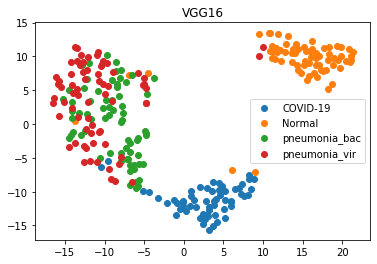

In [19]:
from sklearn.manifold import TSNE

intermediate_layer_model = models.Model(inputs=vgg16.input,
                                        outputs=vgg16.get_layer('feature_dense').output)

tsne_eval_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="categorical")
tsne_eval_generator.reset()
labels = tsne_eval_generator.classes
print(tsne_eval_generator.class_indices)

X = TSNE().fit_transform(intermediate_layer_model.predict_generator(tsne_eval_generator, verbose=1))

classes = ["COVID-19", "Normal", "pneumonia_bac", "pneumonia_vir"]
plt.title('VGG16')
for i in range(4):
    cluster = X[np.where(labels == i)]
    plt.scatter(cluster[:, 0], cluster[:, 1], label = classes[i])
plt.legend()

Found 270 images belonging to 4 classes.
{'covid': 0, 'normal': 1, 'pneumonia_bac': 2, 'pneumonia_vir': 3}
270/270 [==============================] - 6s 22ms/step


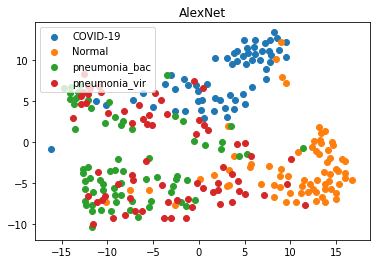

In [28]:
from sklearn.manifold import TSNE

intermediate_layer_model = models.Model(inputs=alexnet.input,
                                        outputs=alexnet.get_layer('feature_dense').output)

tsne_eval_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="categorical")
tsne_eval_generator.reset()
labels = tsne_eval_generator.classes
print(tsne_eval_generator.class_indices)

X = TSNE().fit_transform(intermediate_layer_model.predict_generator(tsne_eval_generator, verbose=1))

classes = ["COVID-19", "Normal", "pneumonia_bac", "pneumonia_vir"]
plt.title('AlexNet')
for i in range(4):
    cluster = X[np.where(labels == i)]
    plt.scatter(cluster[:, 0], cluster[:, 1], label = classes[i])
plt.legend()

Found 270 images belonging to 4 classes.
{'covid': 0, 'normal': 1, 'pneumonia_bac': 2, 'pneumonia_vir': 3}
270/270 [==============================] - 23s 84ms/step


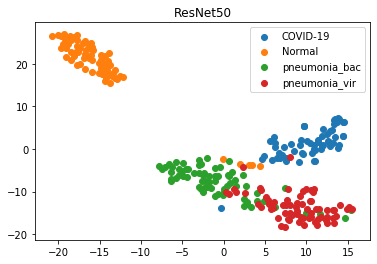

In [21]:
from sklearn.manifold import TSNE

intermediate_layer_model = models.Model(inputs=resnet.input,
                                        outputs=resnet.get_layer('feature_dense').output)

tsne_eval_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="categorical")

labels = tsne_eval_generator.classes
print(tsne_eval_generator.class_indices)

X = TSNE().fit_transform(intermediate_layer_model.predict_generator(tsne_eval_generator, verbose=1))

classes = ["COVID-19", "Normal", "pneumonia_bac", "pneumonia_vir"]
plt.title('ResNet50')
for i in range(4):
    cluster = X[np.where(labels == i)]
    plt.scatter(cluster[:, 0], cluster[:, 1], label = classes[i])
plt.legend()

Found 270 images belonging to 4 classes.
{'covid': 0, 'normal': 1, 'pneumonia_bac': 2, 'pneumonia_vir': 3}
270/270 [==============================] - 10s 36ms/step


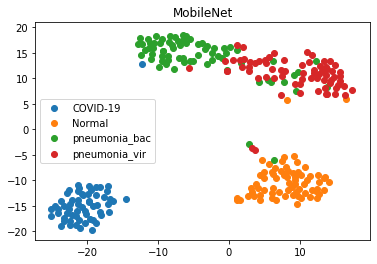

In [22]:
from sklearn.manifold import TSNE

intermediate_layer_model = models.Model(inputs=mobilenet.input,
                                        outputs=mobilenet.get_layer('feature_dense').output)

tsne_eval_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="categorical")

labels = tsne_eval_generator.classes
print(tsne_eval_generator.class_indices)

X = TSNE().fit_transform(intermediate_layer_model.predict_generator(tsne_eval_generator, verbose=1))

classes = ["COVID-19", "Normal", "pneumonia_bac", "pneumonia_vir"]
plt.title('MobileNet')
for i in range(4):
    cluster = X[np.where(labels == i)]
    plt.scatter(cluster[:, 0], cluster[:, 1], label = classes[i])
plt.legend()